# CSE5ML Lab 6A: Introduction to TensorFlow & Regression with Tensorflow

## Introduction

From previous lectures and labs, many of you have learned how to program with Python and built an intelligent system. In this lab, we will start to learn the most popular framwork of neural networks from Google -- TensorFlow. 

From this lab, you will learn 
- How to install Tensorflow.
- How to build simple neural network models for regression tasks (6A). 
- How to build simple neural network models for classification tasks (6B). 

Note: TensorFlow is a tool for machine learning. While it contains a wide range of functionality, TensorFlow is mainly designed for deep neural network models. You are suggested to read the tutorials from the [website](https://www.tensorflow.org/tutorials/).

## Install TensorFlow with Anaconda

Recall what we have learned from the lab 1, the basic operation of Anaconda. First, we create a conda environment named NeuralNetwork with `python 3.7`. Then we select the environment and use the anaconda navigator to install the `tensorflow version 1.15` (you can achieve this through: first, right click on the tensorflow clickable square on the left; second, click "mark for specific version for intallation"; third, select 1.15, and then click apply button on the bottom of Anaconda).

We strongly suggest students intall the CPU version first, because the GPU version need GPU support from CUDA Toolkits and other pacakges, setting up the evironment could be exhausted. You may change the CPU version to GPU version later when you are familar with Tensorflow.

In order to launch jupyter notebook with the created environent NeuralNetwork, you can go to **Anacodna Navigator > Home**, then select environment NeuralNetwork from the dropdown window after **"Applications on"** and check if you have installed jupyter notebook for this environment. If you have intalled, then you can click **"Launch"** to launch jupyter notebook. You should open this file in NeuralNetwork enviroment with tensorflow installed. 

Enter the following short program inside the python interactive shell or jupyter notebook:

In [1]:
import tensorflow as tf
hello = tf.constant("Hello, TensorFlow!")
sess = tf.Session()
print(sess.run(hello))
print(tf.__version__)


b'Hello, TensorFlow!'
1.15.0


Note: you may see some WARNING messages about function deprecation here in the results (and in the following codes). This is not an issue and you can just ignore it (if you run again, this warining message won't show again).

If the system outputs the following, then you are ready to begin writing TensorFlow programs"
```
b'Hello, TensorFlow!'
1.15.0
```
Note: The version of tensorflow may be updated during the time when this lab is being held. DO NOT USE any version >= 2.0.0.

## Program with Tensorflow

###  Simple Regression Task
The central unit of data in TensorFlow is the tensor. A tensor consists of a set of primitive values shaped into an array of any number of dimensions. A tensor's rank is its number of dimensions, while its shape is a tuple of integers specifying the array's length along each dimension. Here are some examples of tensor values:
```
3. # a rank 0 tensor; a scalar with shape [],
[1., 2., 3.] # a rank 1 tensor; a vector with shape [3]
[[1., 2., 3.], [4., 5., 6.]] # a rank 2 tensor; a matrix with shape [2, 3]
[[[1., 2., 3.]], [[7., 8., 9.]]] # a rank 3 tensor with shape [2, 1, 3]
```
TensorFlow uses numpy arrays to represent tensor values. The following codes show how to import the `tensorflow` and `numpy` packages, then use numpy to create a dataset {x,y}.

In [2]:
import tensorflow as tf
import numpy as np

# create data
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data*0.1 + 0.3

Assume we are building a simple model `y=Weights * x + biase` to approximate the dataset `y_data = x_data*0.1 + 0.3`. This is a linear model, but it can also be treated as a neural network with only one hidden node and linear activation function.

So, the learning task for this simple neural netwroks is to learn how to turn `Weights` into `0.1` and `biases` into `0.3`.

Then, we use `tf.variable` to create `Weights, biases` and use them to compute `y`. A `tf.variable` represents a tensor whose value can be changed by running ops (operations) on it. The `tf.random.uniform` outputs random values from a uniform distribution. The `tf.zeros` outputs zeros values. See the [documentation](https://www.tensorflow.org/versions/r1.15/api_docs/python/tf/all_symbols) to find more.

In [3]:
Weights = tf.Variable(tf.random.uniform([1], -1.0, 1.0))
biases = tf.Variable(tf.zeros([1]))

y = Weights*x_data + biases

Then, we compute the mean square error between `y` and `y_data`. `tf.reduce_mean` is to compute the mean of elements across dimensions of an input tensor. 

In [4]:
loss = tf.reduce_mean(tf.square(y-y_data))

Setup the backpropagation training algorithm, we apply the `gradient descent` method.

In [7]:
optimizer = tf.train.GradientDescentOptimizer(0.5) # 0.5 is the learning rate
train = optimizer.minimize(loss) # the purpose is to minimize the `loss` 

Now, we setup everything we need for this simple neural network. Next, we need to initialize all the variables. Only after running tf.global_variables_initializer() in a session, will your variables hold the values you told them to hold when you declare them (tf.Variable(tf.zeros(...)), tf.Variable(tf.random.uniform(...)),...).

In [8]:
init = tf.global_variables_initializer()   

Then we create a `Session` to excute `init` and `train`, and print out the `loss, Weights, biases` every 50 rounds. `sess.run` is used to evaluate and update the variable.

In [9]:
sess = tf.Session()
sess.run(init)          # Very important

for step in range(501):
    sess.run(train)
    if step % 50 == 0:
        print(step, sess.run(loss), sess.run(Weights), sess.run(biases))

0 0.008746787 [0.3744245] [0.20458968]
50 4.3414675e-06 [0.10693446] [0.29617828]
100 3.3181171e-09 [0.10019171] [0.29989436]
150 2.5458268e-12 [0.10000531] [0.2999971]
200 2.1633111e-15 [0.10000014] [0.29999992]
250 1.0167745e-15 [0.1000001] [0.29999995]
300 1.0167745e-15 [0.1000001] [0.29999995]
350 1.0167745e-15 [0.1000001] [0.29999995]
400 1.0167745e-15 [0.1000001] [0.29999995]
450 1.0167745e-15 [0.1000001] [0.29999995]
500 1.0167745e-15 [0.1000001] [0.29999995]


You will findout the results are just what we expected, `Weights (0.1000001)` is close to 0.1 and `biases(0.29999995)` is close to 0.3. The training MSE is very small, almost zero.

Let's put the code together to have a look the structure of the program in tensorflow:

In [10]:
import tensorflow as tf
import numpy as np

# create data / or load your own data
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data*0.1 + 0.3

# define the variables
Weights = tf.Variable(tf.random.uniform([1], -1.0, 1.0))
biases = tf.Variable(tf.zeros([1]))

# defint the model structure and loss function
y = Weights*x_data + biases
loss = tf.reduce_mean(tf.square(y-y_data))

# Setup the backpropagation training algorithm
optimizer = tf.train.GradientDescentOptimizer(0.5) # o.5 is the learning rate
train = optimizer.minimize(loss) # the purpose is to minimize the `loss`

# Use session to initialize the variables and training the model
init = tf.global_variables_initializer()  
sess = tf.Session()
sess.run(init)          # Very important

for step in range(501):
    sess.run(train)
    if step % 50 == 0:
        print(step, sess.run(loss), sess.run(Weights), sess.run(biases))                     

0 0.0078107715 [0.29666477] [0.26695395]
50 3.3868116e-06 [0.10643148] [0.2964571]
100 5.156177e-09 [0.10025094] [0.29986176]
150 7.84253e-12 [0.10000979] [0.29999462]
200 1.2010947e-14 [0.10000039] [0.2999998]
250 8.394446e-16 [0.1000001] [0.29999995]
300 8.394446e-16 [0.1000001] [0.29999995]
350 8.394446e-16 [0.1000001] [0.29999995]
400 8.394446e-16 [0.1000001] [0.29999995]
450 8.394446e-16 [0.1000001] [0.29999995]
500 8.394446e-16 [0.1000001] [0.29999995]


### Regression in Tensorflow

In the last demo, we learn the main structure of the program in tensorflow and obtain basic understanding of the `variable` and `session`. In the following section, we will explory more details about them and introduce `placeholder` and `activation function`.

***Session*** : a Session instance encapsulates the environment in which Operations in a Graph are executed to compute Tensors. 
Here, graph means a data flow representing a TensorFlow computation. For example:

In [11]:
import tensorflow as tf

# create two simple vectors

m1 = tf.constant([[2, 2]])
m2 = tf.constant([[3],
                  [3]])

# run dot product operation
dot_operation = tf.matmul(m1, m2)

print(dot_operation)  # wrong! no result

# method1 use session
sess = tf.Session()
result = sess.run(dot_operation)
print(result)
sess.close()

# method2 use session
with tf.Session() as sess:
    result_ = sess.run(dot_operation)
    print(result_)

Tensor("MatMul:0", shape=(1, 1), dtype=int32)
[[12]]
[[12]]


***Variable***: A TensorFlow variable is the best way to represent shared, persistent state manipulated by your program.

In [13]:
import tensorflow as tf

var = tf.Variable(0)    # our first variable in the "global_variable" set

add_operation = tf.add(var, 1) # calcualtion of var + 1
update_operation = tf.assign(var, add_operation) # Update var by assigning var + 1 to it

with tf.Session() as sess:
    # once define variables, you have to initialize them by doing this
    sess.run(tf.global_variables_initializer())
    for _ in range(3):
        sess.run(update_operation)
        print(sess.run(var))

1
2
3


***Placeholder***: TensorFlow provides a placeholder operation that must be fed with data on execution.

In [15]:
import tensorflow as tf

x1 = tf.placeholder(dtype=tf.float32, shape=None)
y1 = tf.placeholder(dtype=tf.float32, shape=None)
z1 = x1 + y1

x2 = tf.placeholder(dtype=tf.float32, shape=[2, 1])
y2 = tf.placeholder(dtype=tf.float32, shape=[1, 2])
z2 = tf.matmul(x2, y2)

with tf.Session() as sess:
    # when only one operation to run
    z1_value = sess.run(z1, feed_dict={x1: 1, y1: 2})
    print(z1_value)

    # when run multiple operations
    z1_value, z2_value = sess.run(
        [z1, z2],       # run them together
        feed_dict={
            x1: 1, y1: 2,
            x2: [[2], [2]], y2: [[3, 3]]
        })
    print(z1_value)
    print(z2_value)

3.0
3.0
[[6. 6.]
 [6. 6.]]


***Activation Functions***: The activation ops provide different types of nonlinearities for use in neural networks. These include smooth nonlinearities (sigmoid, tanh, elu, softplus, and softmax), continuous but not everywhere differentiable functions (relu, relu6, crelu and relu_x), and random regularization (dropout). See [documentation](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn/activation_functions_)

Note: remember to install the matplotlo

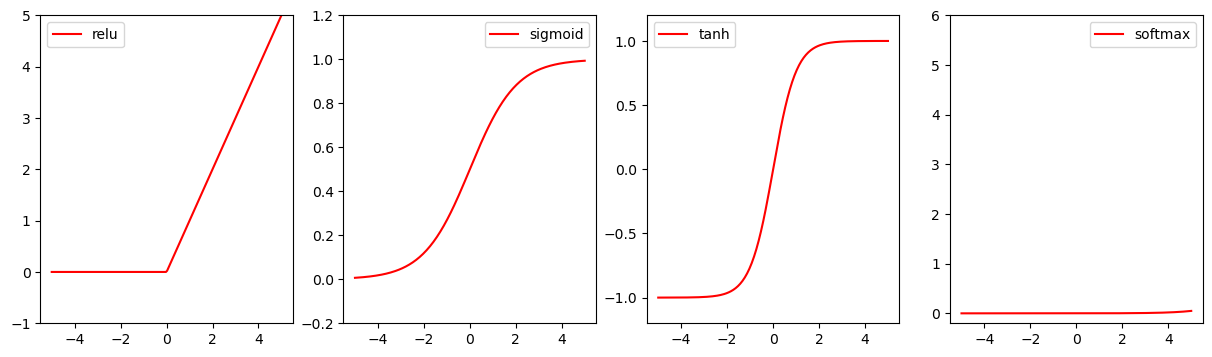

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# fake data
x = np.linspace(-5, 5, 200)     # return 200 evenly spaced numbers between -5 and 5

# following are popular activation functions
y_relu = tf.nn.relu(x)
y_sigmoid = tf.nn.sigmoid(x)
y_tanh = tf.nn.tanh(x)
y_softmax = tf.nn.softmax(x) # softmax is a special kind of activation function, it is about probability

sess = tf.Session()
y_relu, y_sigmoid, y_tanh, y_softmax = sess.run([y_relu, y_sigmoid, y_tanh, y_softmax])

# plt to visualize these activation function
plt.figure(1, figsize=(15, 4))
plt.subplot(141)
plt.plot(x, y_relu, c='red', label='relu')
plt.ylim((-1, 5))
plt.legend(loc='best')

plt.subplot(142)
plt.plot(x, y_sigmoid, c='red', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')

plt.subplot(143)
plt.plot(x, y_tanh, c='red', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.subplot(144)
plt.plot(x, y_softmax, c='red', label='softmax')
plt.ylim((-0.2, 6))
plt.legend(loc='best')

plt.show()

___Regression Task___

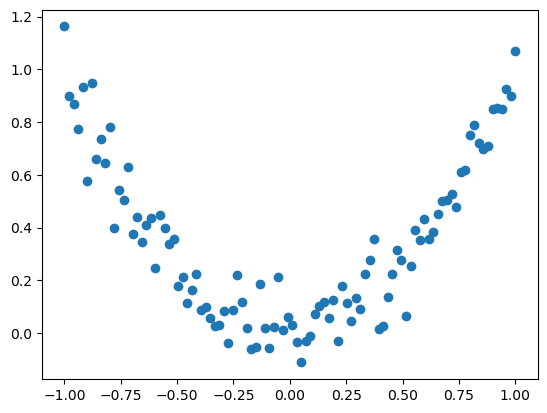




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where





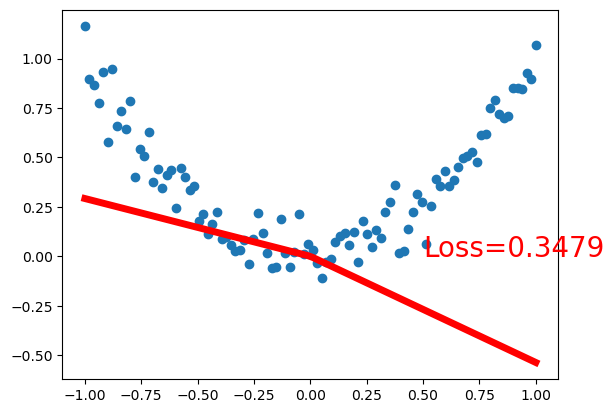

Press Enter to continue...


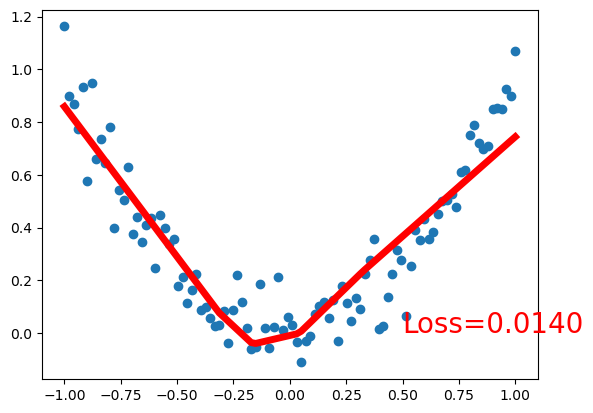

Press Enter to continue...


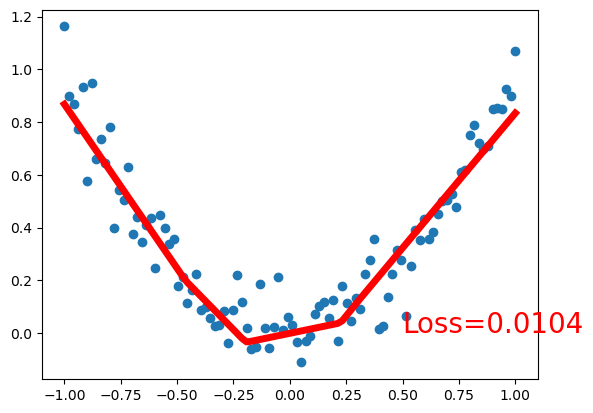

Press Enter to continue...


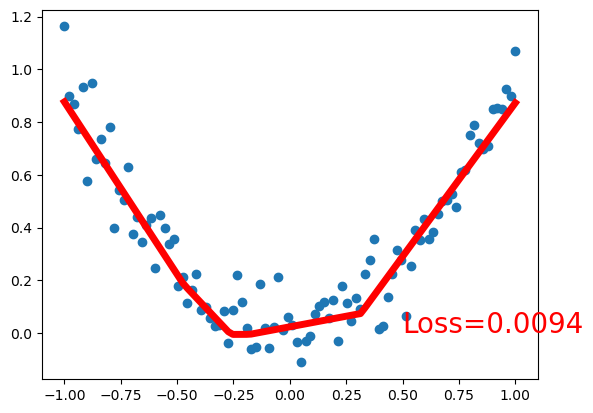

Press Enter to continue...


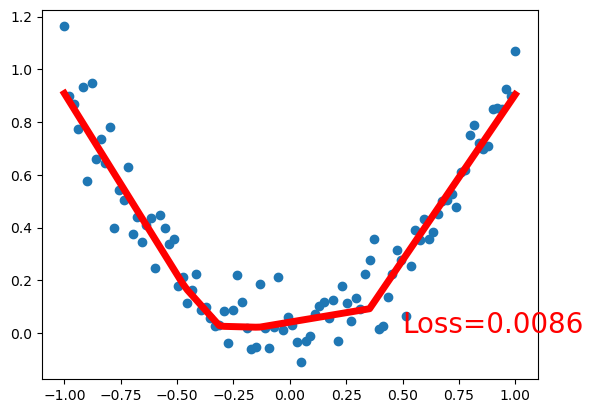

Press Enter to continue...


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

tf.set_random_seed(1)
np.random.seed(1)

# fake data
x = np.linspace(-1, 1, 100)[:, np.newaxis]          # shape (100, 1)
noise = np.random.normal(0, 0.1, size=x.shape)
y = np.power(x,2) + noise                          # shape (100, 1) + some noise

# plot data
plt.scatter(x, y)
plt.show()

tf_x = tf.placeholder(tf.float32, x.shape)     # input x
tf_y = tf.placeholder(tf.float32, y.shape)     # input y

l1 = tf.layers.Dense(10, tf.nn.relu)(tf_x)         # hidden layer: tf_x is the input, 10 hidden nodes, relu activation function
output = tf.layers.Dense(1)(l1)                     # output layer: l1 is the input and 1 outpout

loss = tf.losses.mean_squared_error(tf_y, output)   # compute cost

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train_op = optimizer.minimize(loss)

sess = tf.Session()                                 # control training and others
sess.run(tf.global_variables_initializer())         # initialize var in graph

plt.ion()   # interactive mode showing the image without plt.show()

for step in range(201):
    # train and net output
    _, los, pred = sess.run([train_op, loss, output], {tf_x: x, tf_y: y}) # l and pred are the loss and output of the current neural network model
    if step % 50 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x, y)
        plt.plot(x, pred, 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % los, fontdict={'size': 20, 'color': 'red'})
        plt.pause(0.1) # Pause for interval seconds. If there is an active figure, it will be updated and displayed before the pause.
        input("Press Enter to continue...")
        
plt.ioff() # back to the block mode